In [1]:
import pandas as pd

In [3]:
fns = ["2017-2018_single_MpKrakAlKras_with_NONES_with_forecast3_8_12h.csv", "2017-2018_single_MpKrakBujaka_with_NONES_with_forecast3_8_12h.csv"]

In [19]:
df_AlKras = pd.read_csv(fns[0])
df_AlKras.head(2)

,timestamp,MpKrakAlKras-PM10-1g,Weather,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar),PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,2017-01-01 01:00:00,213.733,Ice fog.,-6.0,1.0,0.0,0.93,10.24,244.690,187.320,121.805
1,2017-01-01 02:00:00,213.868,Ice fog.,-7.0,2.0,190.0,0.93,10.24,224.673,181.194,119.096


In [31]:
X = df_AlKras.drop(['timestamp', 'Weather', 'PM10_Forecast_3h', 'PM10_Forecast_8h',"PM10_Forecast_12h"], axis=1)
X = X.dropna()
X.head(2)

,MpKrakAlKras-PM10-1g,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar)
0,213.733,-6.0,1.0,0.0,0.93,10.24
1,213.868,-7.0,2.0,190.0,0.93,10.24


In [36]:
X.isna().sum(), df_AlKras.isna().sum()

(MpKrakAlKras-PM10-1g    0
 Temp(C)                 0
 Wind(m/s)               0
 Direction(deg)          0
 Humidity                0
 Barometer(mbar)         0
 dtype: int64,
 timestamp                 0
 MpKrakAlKras-PM10-1g    153
 Weather                   0
 Temp(C)                   0
 Wind(m/s)                 0
 Direction(deg)            0
 Humidity                  0
 Barometer(mbar)           0
 PM10_Forecast_3h        156
 PM10_Forecast_8h        161
 PM10_Forecast_12h       165
 dtype: int64)

In [37]:
X.corr()

,MpKrakAlKras-PM10-1g,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar)
MpKrakAlKras-PM10-1g,1.000000,-0.471387,-0.349668,-0.258224,0.195161,0.173665
Temp(C),-0.471387,1.000000,0.030268,0.122197,-0.514297,-0.158797
Wind(m/s),-0.349668,0.030268,1.000000,0.385562,-0.249668,-0.136530
Direction(deg),-0.258224,0.122197,0.385562,1.000000,-0.131797,-0.121825
Humidity,0.195161,-0.514297,-0.249668,-0.131797,1.000000,0.054845
Barometer(mbar),0.173665,-0.158797,-0.136530,-0.121825,0.054845,1.000000


In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

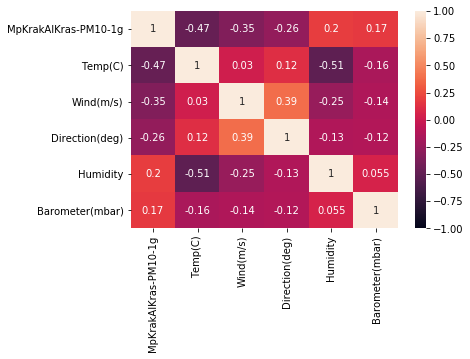

In [44]:
sn.heatmap(X.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler 
sd = StandardScaler()
columns = X.columns
X_std = sd.fit_transform(X)
pd.DataFrame(X_std, columns=columns).head()

,MpKrakAlKras-PM10-1g,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar)
0,3.411388,-1.641338,-1.070933,-1.228682,0.923310,1.008038
1,3.414305,-1.746861,-0.627967,0.462595,0.923310,1.008038
2,3.588402,-1.430292,-0.185001,0.551610,0.165876,0.879984
3,4.080474,-1.746861,-0.185001,0.640624,0.515461,0.751931
4,3.647838,-1.641338,-0.185001,0.551610,0.165876,0.751931


In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_std)

pd.DataFrame(X_pca).head()

,0,1,2,3,4
0,-3.977404,-0.060340,0.562820,1.500243,-0.240184
1,-3.235659,1.087451,0.966310,1.621170,-1.251489
2,-2.609498,0.904659,1.205308,2.268852,-1.137433
3,-3.088178,1.276661,1.060456,2.496021,-1.280576
4,-2.707024,1.036203,1.108126,2.386381,-1.106363


In [88]:
pca.explained_variance_ratio_

array([0.36154607, 0.1985973 , 0.15830847, 0.12528371, 0.10868205])

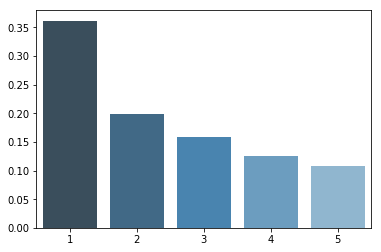

In [91]:
sn.barplot(x = list(range(1, 6)), y = pca.explained_variance_ratio_, palette="Blues_d", )

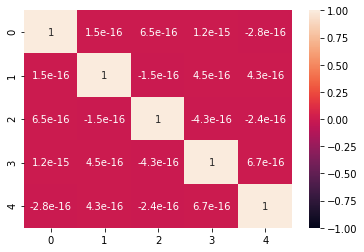

In [92]:
sn.heatmap(pd.DataFrame(X_pca).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

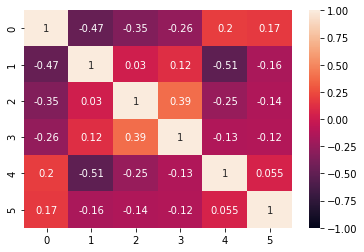

In [93]:
sn.heatmap(pd.DataFrame(X_std).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [95]:
pd.DataFrame(pca.inverse_transform(X_pca))

,0,1,2,3,4,5
0,3.120910,-2.049948,-1.329570,-1.185221,0.629221,0.968390
1,3.124687,-2.154263,-0.885839,0.505928,0.630091,0.968507
2,3.254097,-1.900553,-0.482661,0.601628,-0.172584,0.834355
3,3.669707,-2.324681,-0.550742,0.702083,0.099587,0.695865
4,3.366229,-2.037474,-0.435742,0.593744,-0.119234,0.713494
5,3.187967,-2.013288,-0.796606,0.490933,0.323706,0.726079
6,2.909905,-2.090878,-0.335960,0.665991,0.343810,0.600736
7,2.818451,-2.022086,-1.178349,-1.210632,0.801171,0.607411
8,2.737770,-1.785864,-0.719447,0.566982,0.411441,0.609854
9,2.687008,-1.354450,-0.646754,0.554767,-0.205071,0.620998


In [97]:
pca.transform(X_std[:2])

array([[-3.97740449, -0.06034005,  0.56282046,  1.50024297, -0.24018355],
       [-3.23565864,  1.08745101,  0.96631047,  1.6211704 , -1.25148901]])

In [98]:
import pickle

with open('pca.pkl', 'wb') as pickle_file:
    pickle.dump(pca, pickle_file)

In [100]:
with open('pca.pkl', 'rb') as pickle_file:
    pca_restored = pickle.load(pickle_file)
pca_restored.transform(X_std[:2]) 

array([[-3.97740449, -0.06034005,  0.56282046,  1.50024297, -0.24018355],
       [-3.23565864,  1.08745101,  0.96631047,  1.6211704 , -1.25148901]])

In [101]:
df_AlKras.isna().sum()

timestamp                 0
MpKrakAlKras-PM10-1g    153
Weather                   0
Temp(C)                   0
Wind(m/s)                 0
Direction(deg)            0
Humidity                  0
Barometer(mbar)           0
PM10_Forecast_3h        156
PM10_Forecast_8h        161
PM10_Forecast_12h       165
dtype: int64

In [104]:
df_AlKras.dropna().to_csv("2017-2018_single_MpKrakAlKras_with_forecast3_8_12h_cleared.csv")

In [105]:
df_Bujaka = pd.read_csv(fns[1])
df_Bujaka.head(2)

,timestamp,MpKrakBujaka-PM10-1g,Weather,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar),PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,2017-01-01 01:00:00,392.428,Ice fog.,-6.0,1.0,0.0,0.93,10.24,191.820,153.049,81.3565
1,2017-01-01 02:00:00,258.667,Ice fog.,-7.0,2.0,190.0,0.93,10.24,187.663,127.630,68.4491


In [106]:
df_Bujaka.dropna().to_csv("2017-2018_single_MpKrakBujaka_with_forecast3_8_12h_cleared.csv", in)